In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataset_path = '/content/drive/MyDrive/Colab Notebooks/Oasis Infobyte/Level 1/Project 1/menu.csv'
data = pd.read_csv(dataset_path)

In [39]:
# Fill or drop missing values as needed
data.fillna(method='ffill', inplace=True)  # Forward fill as an example
print("\nMissing values after cleaning:")
print(data.isnull().sum())


Missing values after cleaning:
Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64


<ipython-input-39-b8fba0849058>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill as an example


In [40]:
# Descriptive Statistics
print("\nDescriptive Statistics:")
print(data.describe())

# Calculate mode (as it is not included in .describe())
mode_values = data.mode().iloc[0]
print("\nMode Values:")
print(mode_values)


Descriptive Statistics:
          Calories  Calories from Fat   Total Fat  Total Fat (% Daily Value)  \
count   260.000000         260.000000  260.000000                 260.000000   
mean    368.269231         127.096154   14.165385                  21.815385   
std     240.269886         127.875914   14.205998                  21.885199   
min       0.000000           0.000000    0.000000                   0.000000   
25%     210.000000          20.000000    2.375000                   3.750000   
50%     340.000000         100.000000   11.000000                  17.000000   
75%     500.000000         200.000000   22.250000                  35.000000   
max    1880.000000        1060.000000  118.000000                 182.000000   

       Saturated Fat  Saturated Fat (% Daily Value)   Trans Fat  Cholesterol  \
count     260.000000                     260.000000  260.000000   260.000000   
mean        6.007692                      29.965385    0.203846    54.942308   
std         5.

In [41]:
# Explore specific nutritional analysis (e.g., Calories, Total Fat, Sodium)
print("\nCalories Descriptive Stats:")
print(data['Calories'].describe())

print("\nTotal Fat Descriptive Stats:")
print(data['Total Fat'].describe())


Calories Descriptive Stats:
count     260.000000
mean      368.269231
std       240.269886
min         0.000000
25%       210.000000
50%       340.000000
75%       500.000000
max      1880.000000
Name: Calories, dtype: float64

Total Fat Descriptive Stats:
count    260.000000
mean      14.165385
std       14.205998
min        0.000000
25%        2.375000
50%       11.000000
75%       22.250000
max      118.000000
Name: Total Fat, dtype: float64


In [42]:
# Check correlations between relevant columns (e.g., Total Fat, Calories, Sodium, Carbohydrates)
print("\nCorrelation between nutritional values:")
correlation_matrix = data[['Calories', 'Total Fat', 'Sodium', 'Carbohydrates', 'Dietary Fiber', 'Sugars', 'Protein']].corr()
print(correlation_matrix)


Correlation between nutritional values:
               Calories  Total Fat    Sodium  Carbohydrates  Dietary Fiber  \
Calories       1.000000   0.904409  0.712309       0.781539       0.538894   
Total Fat      0.904409   1.000000  0.846158       0.461213       0.580837   
Sodium         0.712309   0.846158  1.000000       0.200796       0.694389   
Carbohydrates  0.781539   0.461213  0.200796       1.000000       0.224577   
Dietary Fiber  0.538894   0.580837  0.694389       0.224577       1.000000   
Sugars         0.259598  -0.115446 -0.426536       0.762362      -0.295178   
Protein        0.787847   0.807773  0.869802       0.352122       0.641345   

                 Sugars   Protein  
Calories       0.259598  0.787847  
Total Fat     -0.115446  0.807773  
Sodium        -0.426536  0.869802  
Carbohydrates  0.762362  0.352122  
Dietary Fiber -0.295178  0.641345  
Sugars         1.000000 -0.179940  
Protein       -0.179940  1.000000  


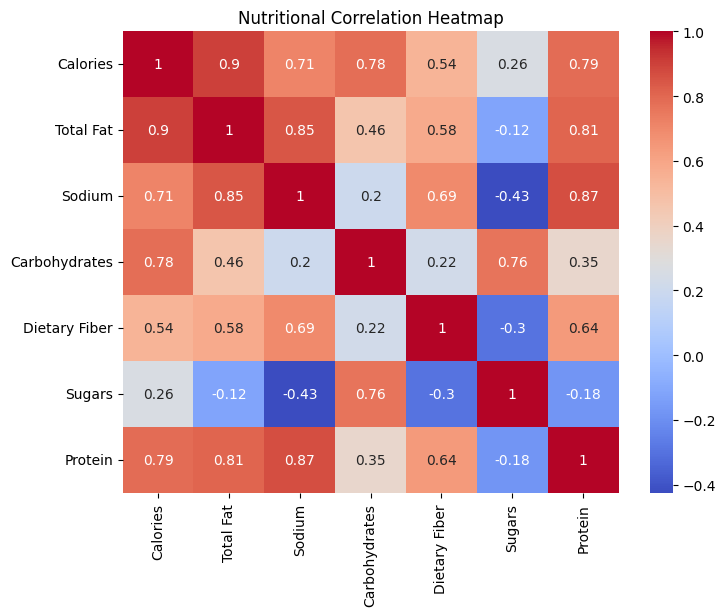

In [43]:
# Visualization
# Heatmap of correlation between selected nutritional variables
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Nutritional Correlation Heatmap')
plt.show()

In [44]:
# Category Analysis (e.g., Top categories based on frequency)
print("\nTop Categories:")
top_categories = data['Category'].value_counts().head(10)
print(top_categories)


Top Categories:
Category
Coffee & Tea          95
Breakfast             42
Smoothies & Shakes    28
Chicken & Fish        27
Beverages             27
Beef & Pork           15
Snacks & Sides        13
Desserts               7
Salads                 6
Name: count, dtype: int64


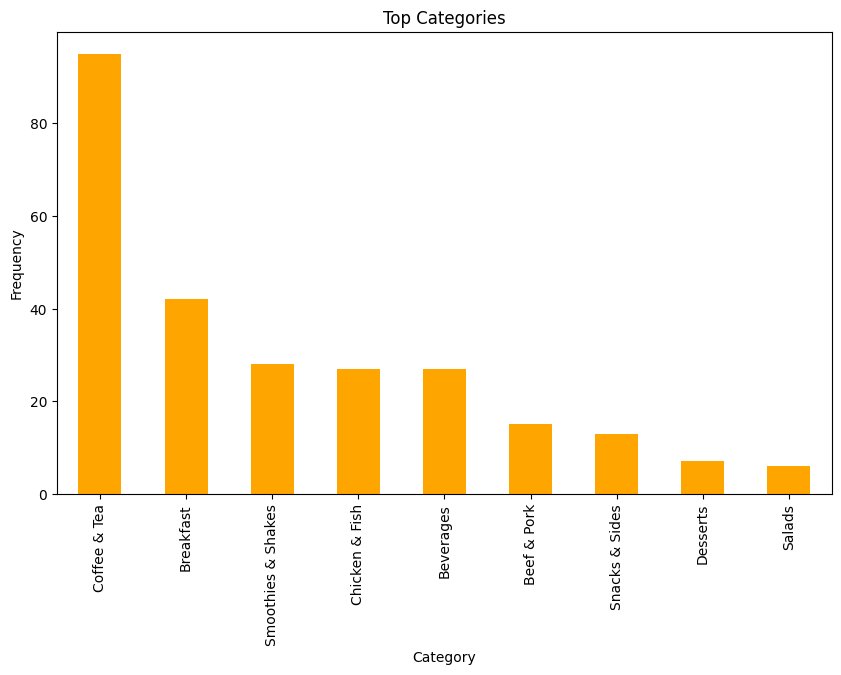

In [45]:
# Plot top categories
plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar', color='orange')
plt.title('Top Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

In [46]:
# Product/Item Analysis (Top items by frequency)
print("\nTop Items:")
top_items = data['Item'].value_counts().head(10)
print(top_items)


Top Items:
Item
Egg McMuffin                           1
Nonfat Latte (Small)                   1
Nonfat Latte (Large)                   1
Nonfat Caramel Latte (Small)           1
Nonfat Caramel Latte (Medium)          1
Nonfat Caramel Latte (Large)           1
Nonfat Hazelnut Latte (Small)          1
Nonfat Hazelnut Latte (Medium)         1
Nonfat Hazelnut Latte (Large)          1
Nonfat French Vanilla Latte (Small)    1
Name: count, dtype: int64


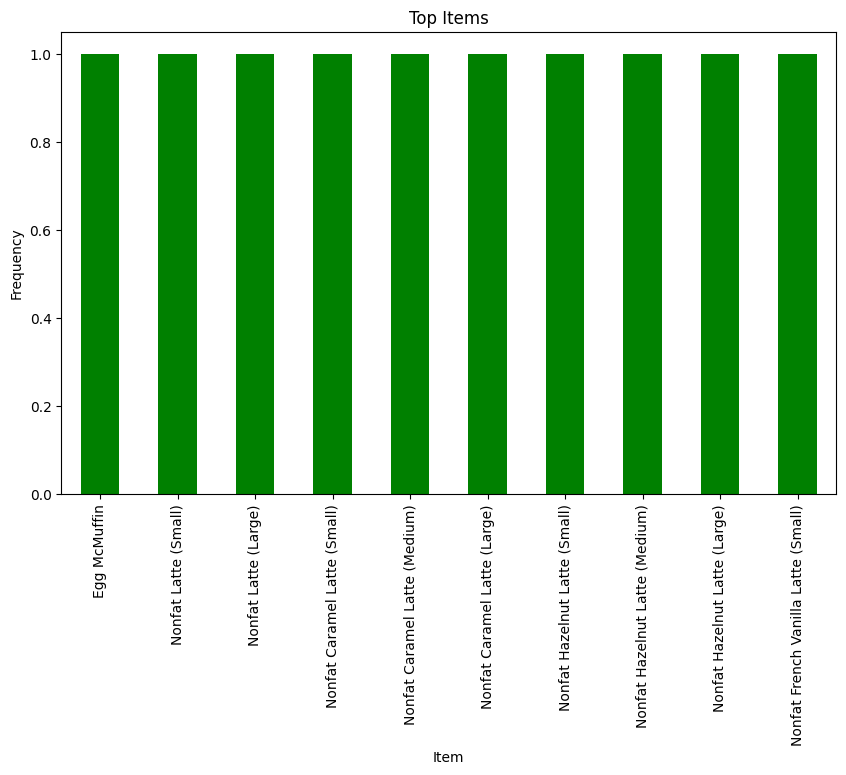

In [47]:
# Plot top items distribution
plt.figure(figsize=(10, 6))
top_items.plot(kind='bar', color='green')
plt.title('Top Items')
plt.xlabel('Item')
plt.ylabel('Frequency')
plt.show()

In [48]:
# Recommendations
print("\nRecommendations:")
print("1. Focus marketing efforts on the most frequent categories and items.")
print("2. Investigate further the relationship between calories, fat, and sodium content for healthier options.")
print("3. Leverage data on nutritional value (e.g., Protein, Fiber, Sugars) to promote health-conscious products.")
print("4. Offer dietary suggestions based on customer preferences for specific categories or items.")



Recommendations:
1. Focus marketing efforts on the most frequent categories and items.
2. Investigate further the relationship between calories, fat, and sodium content for healthier options.
3. Leverage data on nutritional value (e.g., Protein, Fiber, Sugars) to promote health-conscious products.
4. Offer dietary suggestions based on customer preferences for specific categories or items.
